<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Generación para el CLUR </font>
</div>

<div align="center"> 
<font size=5> Máscara de Teflón </font>
</div>

- **Para**: Fabricación de máscaras en CLUR con laser de femtosegundos

- **Fecha**: 2024/02/28
        
- **Objetivos**: Máscara en teflón para Mahmoud

- **Descripción** - 

- **Referencias**: -

- **Autores**: Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
from py_aocg.dxf_contour import DXF_mask_contour, addpoint
from py_aocg.dxf_contour import mm, um, nm, inches

## Draw circles

In [4]:
cutting_dict = dict(
                    r0 = (0,0),
                    type = 'rectangular',
                    size = (15*mm, 15*mm),
                    )

In [5]:
pitch = 0.5*mm

width_vert = 200 *um # (150 - 200)
width_comb = 100 *um # (50 - 100)
length_comb = 5*mm

square_vert = 1*mm
square_hor  = 0.5*mm

size_external_cut = 15*mm, 15*mm
area_engraving = 10*mm, 10*mm



In [6]:


num_periods=int(size_external_cut[1] / (width_vert+pitch))

total_heigth = num_periods*(pitch+width_comb) + width_comb

print(num_periods)



21


240228 clur - mahmoud 3.png
filename = 240228 clur - mahmoud 3.dxf


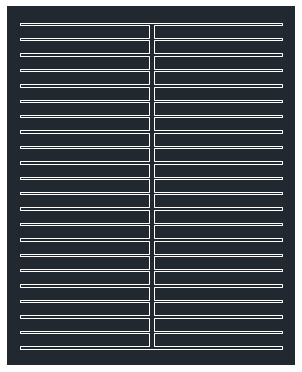

In [7]:
r0=[2.5*mm, 1*mm]


mask = DXF_mask_contour(filename="240228 clur - mahmoud 3", cutting_dict=cutting_dict)



# Structure 1
def repeat_structure_1(points):
    points=addpoint(0,width_comb,points)
    points=addpoint(length_comb,0,points)
    points=addpoint(0,pitch,points)
    points=addpoint(-length_comb,0,points)
    return points

p0 = (r0[0], r0[1])
points = [p0,]

for i in range(num_periods):
    points = repeat_structure_1(points)

points=addpoint(0,width_comb,points)
points=addpoint(2*length_comb+width_vert,0,points)


# Structure 2
def repeat_structure_2(points):
    points=addpoint(0,-width_comb,points)
    points=addpoint(-length_comb,0,points)
    points=addpoint(0,-pitch,points)
    points=addpoint(length_comb,0,points)
    return points

for i in range(num_periods):
    points = repeat_structure_2(points)

points=addpoint(0,-width_comb,points)


mask.msp.add_lwpolyline(points, close=True)



mask.draw()
mask.save(verbose=True)

240228 clur - mahmoud 3_cutting.png


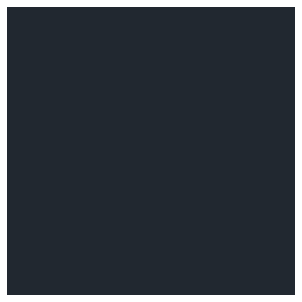

In [8]:
mask.cutting(has_save=True, has_png=True, has_draw=True)

240228 clur - mahmoud 3_all.png


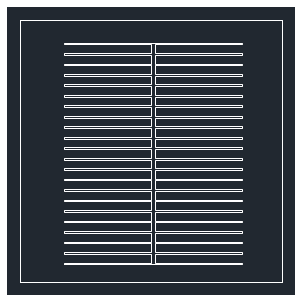

In [9]:
mask.draw_all(has_save= True, has_png = True, has_draw = True)